## **Predicting asthma hospital visits based on air pollution levels-Modeling**

**Capstone Project Two : Springboard Data Science career track**

**Introduction:**

**1. The Problem:**

The central issue addressed here is the correlation between air quality and respiratory problems (specifically, people with asthma who visit hospitals) in New York City. Specifically, we are interested in determining whether there is a significant relationship between atmospheric pollutants and the prevalence of asthma-related hospital visits among the city's population.

New York City, as a densely populated urban area, faces significant challenges related to air pollution. This study is crucial in the context of rising concerns about environmental health, urban living, and sustainable city planning. The findings can inform policy decisions, public health initiatives, and individual awareness regarding the impact of air quality on health outcomes.

**2. The Data:**

The NYC Environment & Health Data Portal(NYC.gov)publishing data about environmental pollutants and health,  explaining the connection between two. I have downloaded the data from the NYC.gov website.

**3. The questions of interest:**

This data analysis and story-telling report is organized around the following questions of interest:

* How are NO2 and PM2.5 levels correlated with the number of hospital visits due to asthma?

* Are there specific geographic areas where the correlation between air pollution (NO2 and PM2.5) and asthma hospital visits is stronger?
* How have NO2 and PM2.5 levels changed over the years, and how does this trend correlate with the number of asthma-related hospital visits?
* Can we develop a predictive model to forecast the number of asthma-related hospital visits based on NO2 and PM2.5 levels?


**4. Import the necessary libraries and the data:**

To start, let's first import all the necessary modules and libraries and read the data set into the Pandas dataframe. These are some data wrangling and exploratory analysis from the previous part. For detailed EDA, see the following:

https://github.com/Mary080102/Capston-Two/blob/702e2d32a0447fadb3b12368cb84e63dc31e0d75/Air%20quality-%20Exploratory%20Data%20Analysis.ipynb

https://github.com/Mary080102/Capston-Two/blob/702e2d32a0447fadb3b12368cb84e63dc31e0d75/Pre-processing%20and%20Training%20Data%20Development.ipynb


**4.1.Import libraries**

In [108]:
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import SVR

import matplotlib.pyplot as plt


**4.2.Load the Data**

In [82]:
df= pd.read_csv('https://raw.githubusercontent.com/Mary080102/Capston-Two/main/Raw%20data/aa_transformed')

In [83]:
#Exploring data
df.head()

,Year,Number,no2/Mean ppb,pm/Mean mcg/m3,GeoType_Borough,GeoType_CD,GeoType_Citywide,GeoType_UHF42
0,2020,-1.996623,0.921234,0.301370,False,True,False,False
1,2020,-1.984977,0.818190,0.438356,False,True,False,False
2,2020,-0.258725,0.328731,0.301370,False,True,False,False
3,2020,-0.702377,1.127321,0.369863,False,True,False,False
4,2020,-1.655852,2.106239,0.534247,False,True,False,False


**5. Data preperation and the feature selection:**
Based on the results from previouse step(EDA)and correlation matrix the following features will be considered:

* GeoType_Borough
* GeoType_CD
* GeoType_Citywide
* GeoType_UHF42
* Year
* Number(The number of adults who make emergency hospital visits due to asthma)
* no2/Mean ppb (mean of NO2)
* pm/Mean mcg/m3 (mean PM2.5)


**6. Applying the Machine Learning models:**

This is a regression problem, in supervised learning. Here we have used the following regression models:

1. Multiple Linear Regression

2. Ridge Regression (Regularized Linear Regression)

3. Random Forest

4. Time Series Decomposition


**6.1.Train/Test Split**

While this dataset is cleaned in the previouse section, and hence doesn't require much for analysis, we still need to split our dataset into a test set and a training set.

In [84]:
#Separate the features and the target variable
X=df.drop(columns=['Number'])
y=df['Number']

# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

# Print the shape of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (277, 7)
X_test shape: (70, 7)
y_train shape: (277,)
y_test shape: (70,)


**6.2.Making a Multiple Linear Regression Model**

In [85]:
model1=  LinearRegression()
model1.fit(X_train,y_train)
y_pred= model1.predict(X_test)

In [86]:
#  validate
mse_mlr = mean_squared_error(y_test,y_pred)

mae_mlr= mean_absolute_error(y_test,y_pred)

r2_mlr = r2_score(y_test, y_pred)
print(f"Multiple Linear Regression: MSE={mse_mlr},\n MAE={mae_mlr},\nR2={r2_mlr}")

Multiple Linear Regression: MSE=0.3887239705747481,
 MAE=0.47407369080810874,
R2=0.609806902200249


A lower MSE indicates a better fit of the model to the data. In this case, an MSE of 0.3887 suggests that, on average, the squared error of predictions is around 0.3887.

R2 of 0.6098 means that approximately 60.98% of the variance in the target variable is explained by the model. This indicates a moderate fit, as the model explains a significant portion of the variance .

In [87]:
#Assessing performance using cross-validation

cv_scores_test = cross_val_score(model1,X_test,y_test,cv=5)
cv_scores_train= cross_val_score(model1,X_train,y_train,cv=5)
print(cv_scores_test)
cv_scores_model1_test=cv_scores_test.mean()
cv_scores_model1_train=cv_scores_train.mean()
cv_scores_std_model1=cv_scores_test.std()

print ('Mean cross validation test score: ' +str(cv_scores_model1_test))
print ('Mean cross validation train score: ' +str(cv_scores_model1_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_model1))

[0.18224036 0.07542113 0.35927246 0.66456374 0.66108198]
Mean cross validation test score: 0.38851593605384144
Mean cross validation train score: 0.5188456348959956
Standard deviation in cv scores: 0.24163103493216326


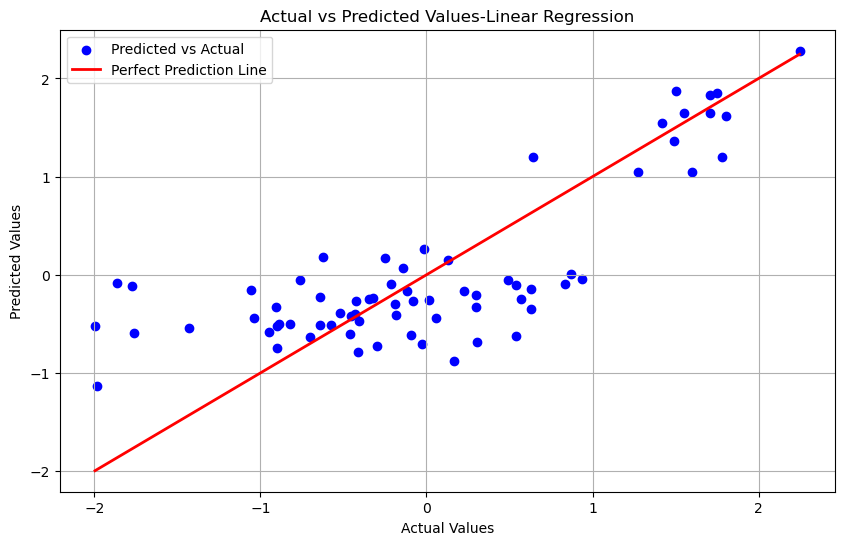

In [88]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,color='blue',label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values-Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

**6.3 Ridge Regression (Regularized Linear Regression)**

In [ ]:
# Define the Ridge regression model
#model2= Ridge()

# Define the hyperparameters and grid search
#param_grid_ridge={'alpha': [0.1, 1, 10, 100, 1000]}
#grid_search_ridge= GridSearchCV(model2,param_grid_ridge,cv=5,scoring='neg_mean_squared_error')
#grid_search_ridge.fit(X_train,y_train)

#print("Best value for alpha : ",grid_search_ridge.best_params_)
#print("Best score for cost function: ", grid_search_ridge.best_score_)

# Best model
#best_ridge = grid_search_ridge.best_estimator_

# Predictions
#y_pred_ridge = best_ridge.predict(X_test)

# Evaluation
#mse_ridge = mean_squared_error(y_test, y_pred_ridge)
#r2_ridge = best_ridge.score(X_test, y_test)

#print(f"Ridge Regression: MSE={mse_ridge}, R2={r2_ridge}")

In [89]:
# Initialize and fit the model

model2= Ridge(alpha=1.0)
model2.fit(X_train,y_train)

# Predict and evaluate
y_pred_ridge= model2.predict(X_test)


mse_ridge = mean_squared_error(y_test,y_pred_ridge)

mae_ridge= mean_absolute_error(y_test,y_pred_ridge)

r2_ridge = r2_score(y_test,y_pred_ridge)
print(f"Regularized Linear Regression:\n MSE={mse_mlr},\n MAE={mae_mlr},\nR2={r2_mlr}")

Regularized Linear Regression:
 MSE=0.3887239705747481,
 MAE=0.47407369080810874,
R2=0.609806902200249


In [90]:
#Assessing performance using cross-validation
cv_scores_test = cross_val_score(model2,X_test,y_test,cv=5)
cv_scores_train= cross_val_score(model2,X_train,y_train,cv=5)
print(cv_scores_test)
cv_scores_model2_test=cv_scores_test.mean()
cv_scores_model2_train=cv_scores_train.mean()
cv_scores_std_model2=cv_scores_test.std()

print ('Mean cross validation test score: ' +str(cv_scores_model2_test))
print ('Mean cross validation train score: ' +str(cv_scores_model2_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_model2))


[ 0.35642552 -0.01293025  0.33233728  0.55320905  0.60790901]
Mean cross validation test score: 0.36739012265509186
Mean cross validation train score: 0.5100642431170226
Standard deviation in cv scores: 0.21834400575797025


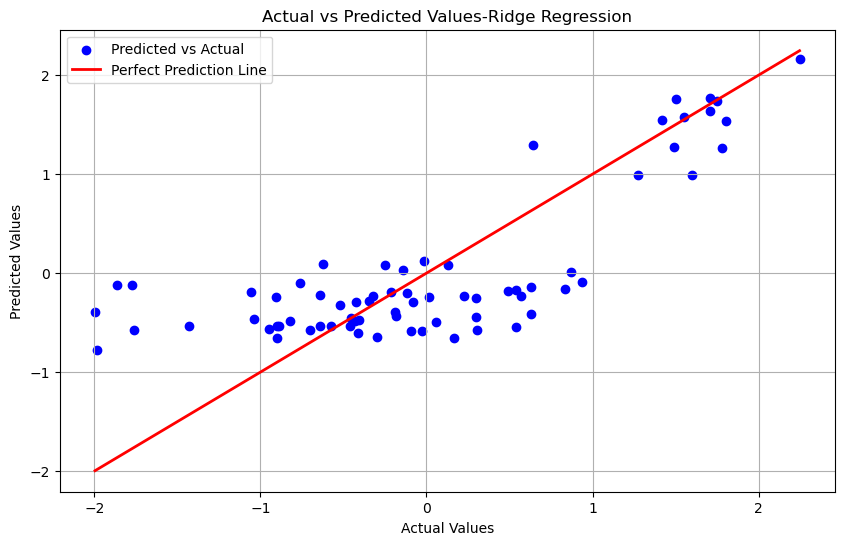

In [91]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values-Ridge Regression')
plt.legend()
plt.grid(True)
plt.show()

**6.4.Gradient Boosting Machines (GBM)**

In [92]:

# Train GBM model
model3 = GradientBoostingRegressor()
model3.fit(X_train, y_train)

# Predict on the test set
y_pred_gbm= model3.predict(X_test)

# Evaluate model performance
mse_gbm = mean_squared_error(y_test,y_pred_gbm)

mae_gbm= mean_absolute_error(y_test,y_pred_gbm)

r2_gbm = r2_score(y_test,y_pred_gbm)
print(f"Gradient Boosting Machines:\n MSE={mse_mlr},\n MAE={mae_mlr},\nR2={r2_mlr}")


Gradient Boosting Machines:
 MSE=0.3887239705747481,
 MAE=0.47407369080810874,
R2=0.609806902200249


In [93]:
#Assessing performance using cross-validation
cv_scores_test = cross_val_score(model3,X_test,y_test,cv=5)
cv_scores_train= cross_val_score(model2,X_train,y_train,cv=5)
print(cv_scores_test)
cv_scores_model3_test=cv_scores_test.mean()
cv_scores_model3_train=cv_scores_train.mean()
cv_scores_std_model3=cv_scores_test.std()

print ('Mean cross validation test score: ' +str(cv_scores_model3_test))
print ('Mean cross validation train score: ' +str(cv_scores_model3_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_model3))

[ 0.26907036 -1.648368    0.31241192  0.55181674  0.52418806]
Mean cross validation test score: 0.0018238133590573469
Mean cross validation train score: 0.5100642431170226
Standard deviation in cv scores: 0.8326314111714003


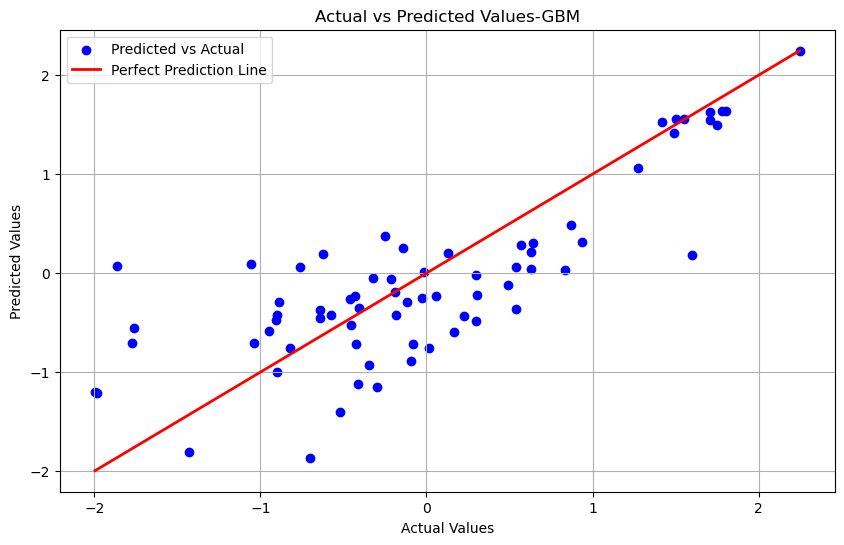

In [78]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gbm, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction Line')


# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values-GBM')
plt.legend()
plt.grid(True)
plt.show()

**6.5.Making Random Forest Model**

In [ ]:
# Define the parameter grid for hyperparameter tuning
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the RandomizedSearchCV for hyperparameter tuning
#model3 = RandomForestRegressor(random_state=42)
#random_search=RandomizedSearchCV(model3, param_grid, n_iter=100, cv=5, scoring='neg_mean_squared_error',
                                # n_jobs=-1, random_state=42)
#random_search.fit(X_train,y_train)

# Best model from random search
#best_rf= random_search.best_estimator_

# Predictions
#y_pred_rf= best_rf.predict(X_test)

# Evaluation
#mse_rf = mean_squared_error(y_test, y_pred_rf)
#r2_rf = best_rf.score(X_test, y_test)
#mae_rf=mean_absolute_error(y_test,y_pred_rf)
#rmse_rf=np.sqrt(mse_rf)

#print(f"Random Forest Regression(model3): MSE={mse_rf}, R2={r2_rf},MAE={mae_rf}")



In [94]:
# Initialize and fit the model

model4= RandomForestRegressor(random_state=42)
model4.fit(X_train,y_train)

# Predict and evaluate

y_pred_rf= model4.predict(X_test)

mse_rf = mean_squared_error(y_test,y_pred_rf)

mae_rf= mean_absolute_error(y_test,y_pred_rf)

r2_rf = r2_score(y_test,y_pred_rf)
print(f"Random Forest:\n MSE={mse_mlr},\n MAE={mae_mlr},\nR2={r2_mlr}")


Random Forest:
 MSE=0.3887239705747481,
 MAE=0.47407369080810874,
R2=0.609806902200249


In [95]:
#Assessing performance using cross-validation
cv_scores_test = cross_val_score(model4,X_test,y_test,cv=5)
cv_scores_train= cross_val_score(model4,X_train,y_train,cv=5)
print(cv_scores_test)
cv_scores_model4_test=cv_scores_test.mean()
cv_scores_model4_train=cv_scores_train.mean()
cv_scores_std_model4=cv_scores_test.std()

print ('Mean cross validation test score: ' +str(cv_scores_model4_test))
print ('Mean cross validation train score: ' +str(cv_scores_model4_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_model4))

[ 0.29647033 -0.99556335  0.43514606  0.61302735  0.61017285]
Mean cross validation test score: 0.19185064940973234
Mean cross validation train score: 0.5656548656443825
Standard deviation in cv scores: 0.605388010927307


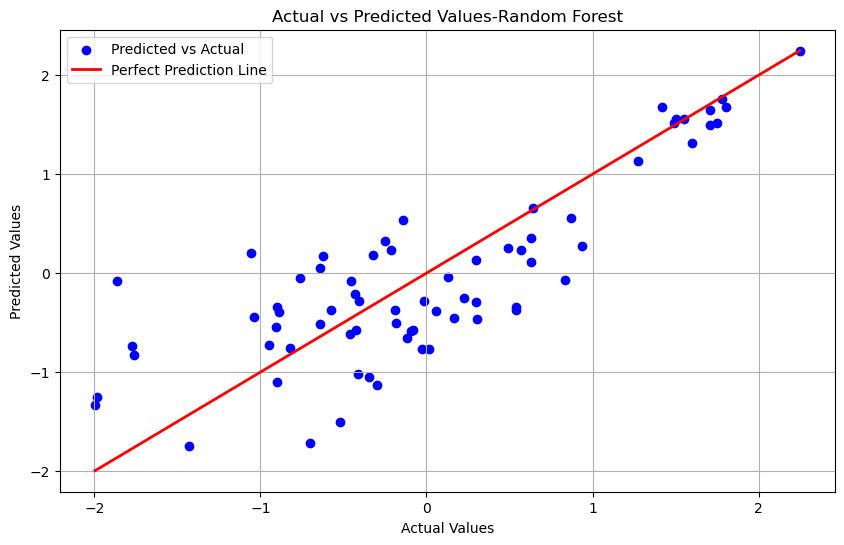

In [96]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction Line')

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values-Random Forest')
plt.legend()
plt.grid(True)
plt.show()

**6.6.Support Vector Regression Model (SVR)**

In [97]:
# Define the SVR model 
model5= SVR()

# Fit the model to the training data
model5.fit(X_train,y_train)

# Predict on the test set
y_pred_svr= model5.predict(X_test)

# Evaluate the model

mse_svr = mean_squared_error(y_test,y_pred_svr)

mae_svr= mean_absolute_error(y_test,y_pred_svr)

r2_svr = r2_score(y_test,y_pred_svr)
print(f"Random Forest:\n MSE={mse_mlr},\n MAE={mae_mlr},\nR2={r2_mlr}")

Random Forest:
 MSE=0.3887239705747481,
 MAE=0.47407369080810874,
R2=0.609806902200249


In [98]:
#Assessing performance using cross-validation

cv_scores_test = cross_val_score(model5,X_test,y_test,cv=5)
cv_scores_train= cross_val_score(model5,X_train,y_train,cv=5)
print(cv_scores_test)
cv_scores_model5_test=cv_scores_test.mean()
cv_scores_model5_train=cv_scores_train.mean()
cv_scores_std_model5=cv_scores_test.std()

print ('Mean cross validation test score: ' +str(cv_scores_model5_test))
print ('Mean cross validation train score: ' +str(cv_scores_model5_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_model5))

[-0.2262462  -0.00325487 -0.00224176 -0.0009567  -0.13300333]
Mean cross validation test score: -0.07314057117550248
Mean cross validation train score: -0.022295864230819175
Standard deviation in cv scores: 0.09181072748776693


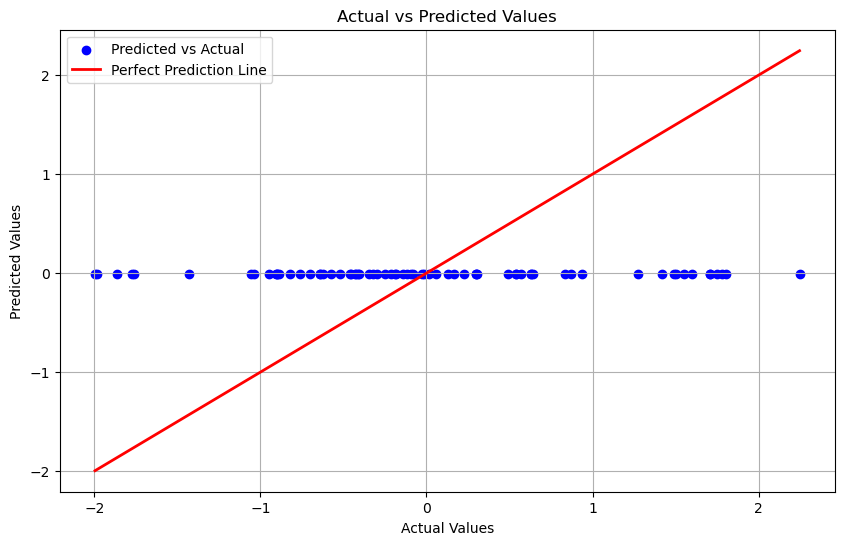

In [99]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction Line')

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

**6.6.Comparison and Model Selection**

We applied different ML models above and evaluated their performances using cross-validation for both the training and test data. Here we have tabulated the scores and plotted them.

In [100]:
# Model performance metrics
metrics = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Gradient Boosting', 'Random Forest','SVR'],
    'R2': [r2_mlr, r2_ridge, r2_gbm, r2_rf,r2_svr],
    'MAE': [mae_mlr, mae_ridge, mae_gbm, mae_rf,mae_svr],
    'MSE': [mse_mlr, mse_ridge, mse_gbm, mse_rf,mse_svr],
    'CV_Score_train': [cv_scores_model1_train, cv_scores_model2_train, cv_scores_model3_train, cv_scores_model4_train,cv_scores_model5_train],
    'CV_Score_test': [cv_scores_model1_test, cv_scores_model2_test, cv_scores_model3_test, cv_scores_model4_test,cv_scores_model5_test]
}
# Create a DataFrame
df_metrics = pd.DataFrame(metrics)

# Display the summary table
df_metrics

,Model,R2,MAE,MSE,CV_Score_train,CV_Score_test
0,Linear Regression,0.609807,0.474074,0.388724,0.518846,0.388516
1,Ridge Regression,0.600560,0.475445,0.397936,0.510064,0.367390
2,Gradient Boosting,0.629611,0.473697,0.368995,0.510064,0.001824
3,Random Forest,0.665542,0.465862,0.333199,0.565655,0.191851
4,SVR,0.000395,0.792781,0.995842,-0.022296,-0.073141


Based on these metrics, **Random Forest** and **Gradian Boosting** are the best model among the ones compared. They have the lowest MSE, highest R².

**7.Applying Grid search CV for hyperparameter Tuning**

**7.1. Parameter Tuning for Gradiant Boosting Regression**

In [105]:
# Define the model
gba= GradientBoostingRegressor()

# Define the parameter grid

gba_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Instantiate Grid Search CV
grid_search= GridSearchCV(gba,param_grid=gba_param_grid, cv=5, n_jobs=-1, verbose=0)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Refit the model with the best parameters on the entire dataset
best_model = grid_search.best_estimator_
best_model.fit(X, y)

# Evaluate on the test set
test_score = best_model.score(X_test, y_test)
print("Test Score:", test_score)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300, 'subsample': 1.0}
Best Score: 0.6104932529609994
Test Score: 0.7831455420982433


In [122]:
# Feature importances

importances= best_model.feature_importances_
feature_names = X.columns  

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort feature importances in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

feature_importances

,Feature,Importance
3,GeoType_Borough,0.364385
1,no2/Mean ppb,0.232752
5,GeoType_Citywide,0.223834
0,Year,0.074153
2,pm/Mean mcg/m3,0.040020
6,GeoType_UHF42,0.033281
4,GeoType_CD,0.031575


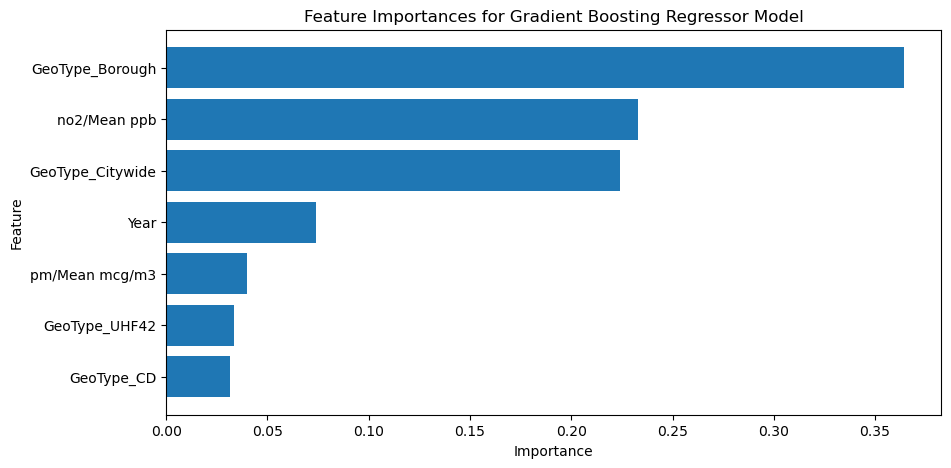

In [123]:
# Visual comparison
plt.figure(figsize=(10,5))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Gradient Boosting Regressor Model')
plt.gca().invert_yaxis()
plt.show()

**7.2. Parameter Tuning for Random Forest Regression**

In [111]:
# Define the model
rf= RandomForestRegressor()

# Define the parameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate Grid Search CV
grid_search_rf= GridSearchCV(rf,param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=0)

# Fit the grid search to the data
grid_search_rf.fit(X_train,y_train)

# Get the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_


print("Best Parameters:", best_params_rf)
print("Best Score:", best_score_rf)

# Refit the model with the best parameters on the entire dataset
best_model2 = grid_search_rf.best_estimator_
best_model2.fit(X, y)

# Evaluate on the test set
test_score_rf = best_model2.score(X_test, y_test)
print("Test Score:", test_score_rf)

Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best Score: 0.5853774998012962
Test Score: 0.7938148957376191


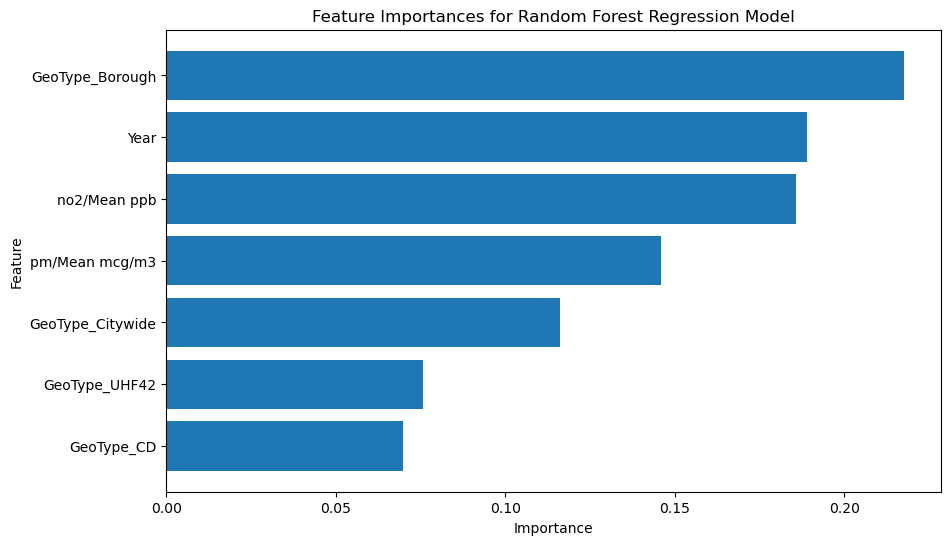

In [130]:
# Feature importances
importance = best_model2.feature_importances_

features = X.columns  # Assuming X is a pandas DataFrame
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})

# Sort feature importances in descending order
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

feature_importance

# Plot feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Random Forest Regression Model')
plt.gca().invert_yaxis()
plt.show()